In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV

In [2]:
# Load the dataset
video = pd.read_csv('Video_Games_Sales_as_at_22_Dec_2016.csv')
video.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       7590 non-null   float64
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(10), object(6)
memory usage: 2.0+ MB


In [3]:
video.head(10)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,NaN,NaN,NaN,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.44,6.94,4.70,2.24,28.32,87.0,80.0,8.4,594.0,Nintendo,E
9,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
video.tail(20)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
16699,Planet Monsters,GBA,2001.0,Action,Titus,0.01,0.00,0.00,0.0,0.01,67.0,9.0,NaN,NaN,Planet Interactive,E
16700,Breach,PC,2011.0,Shooter,Destineer,0.01,0.00,0.00,0.0,0.01,61.0,12.0,5.8,43.0,Atomic Games,T
16701,Bust-A-Move 3000,GC,2003.0,Puzzle,Ubisoft,0.01,0.00,0.00,0.0,0.01,53.0,4.0,NaN,NaN,Taito Corporation,E
16702,Mega Brain Boost,DS,2008.0,Puzzle,Majesco Entertainment,0.01,0.00,0.00,0.0,0.01,48.0,10.0,NaN,NaN,Interchannel-Holon,E
16703,The Longest 5 Minutes,PSV,2016.0,Action,Nippon Ichi Software,0.00,0.00,0.01,0.0,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16704,Mezase!! Tsuri Master DS,DS,2009.0,Sports,Hudson Soft,0.00,0.00,0.01,0.0,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16705,Eiyuu Densetsu: Sora no Kiseki Material Collec...,PSP,2007.0,Role-Playing,Falcom Corporation,0.00,0.00,0.01,0.0,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16706,STORM: Frontline Nation,PC,2011.0,Strategy,Unknown,0.00,0.01,0.00,0.0,0.01,60.0,12.0,7.2,13.0,SimBin,E10+
16707,Strawberry Nauts,PSV,2016.0,Adventure,Unknown,0.00,0.00,0.01,0.0,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16708,Plushees,DS,2008.0,Simulation,Destineer,0.01,0.00,0.00,0.0,0.01,NaN,NaN,NaN,NaN,Big John Games,E


In [5]:
video.describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count
count,16450.000000,16719.000000,16719.000000,16719.000000,16719.000000,16719.000000,8137.000000,8137.000000,7590.000000,7590.000000
mean,2006.487356,0.263330,0.145025,0.077602,0.047332,0.533543,68.967679,26.360821,7.125046,162.229908
std,5.878995,0.813514,0.503283,0.308818,0.186710,1.547935,13.938165,18.980495,1.500006,561.282326
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,0.000000,4.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000,60.000000,12.000000,6.400000,10.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000,71.000000,21.000000,7.500000,24.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,0.470000,79.000000,36.000000,8.200000,81.000000
max,2020.000000,41.360000,28.960000,10.220000,10.570000,82.530000,98.000000,113.000000,9.700000,10665.000000


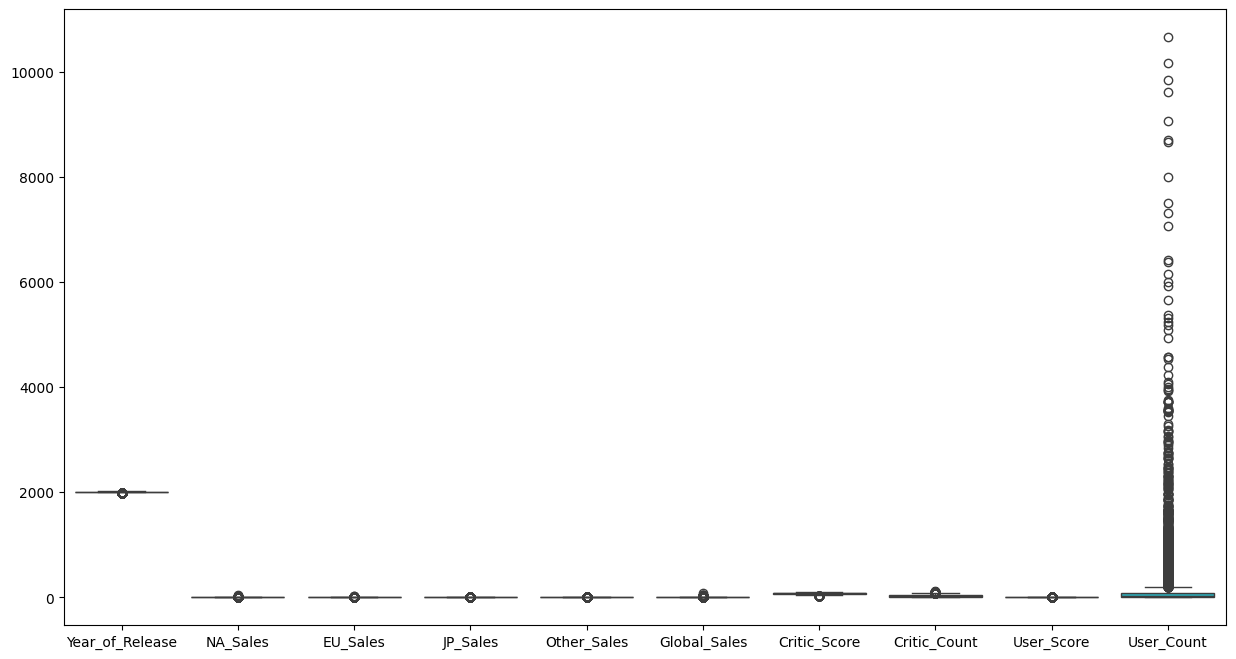

In [6]:
#check for outliners
import seaborn as sns
plt.subplots(figsize=(15, 8))
#sns.boxplot(video['Year_of_Release'])
sns.boxplot(video)
plt.show()

In [7]:
#remove the User_Count col as it has too many outliners
video=video.drop(columns=['User_Count'])

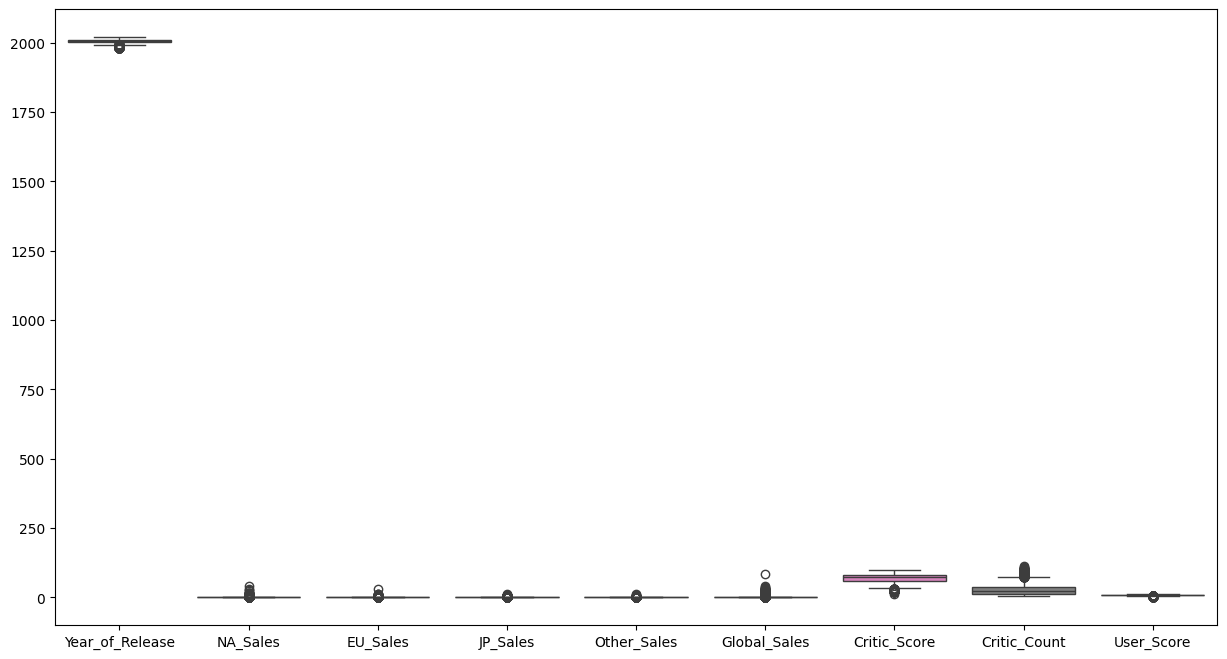

In [8]:
#check for outliners
import seaborn as sns
plt.subplots(figsize=(15, 8))
#sns.boxplot(video['Year_of_Release'])
sns.boxplot(video)
plt.show()

In [9]:
# missing values for each col
print(video.isnull().sum())
print(video.shape)

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         9129
Developer          6623
Rating             6769
dtype: int64
(16719, 15)


In [10]:
print(pd.value_counts(video["Platform"]))

Platform
PS2     2161
DS      2152
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      432
PS4      393
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
NES       98
GB        98
DC        52
GEN       29
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: count, dtype: int64


C:\Users\HP\AppData\Local\Temp\ipykernel_18132\2291211703.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  print(pd.value_counts(video["Platform"]))


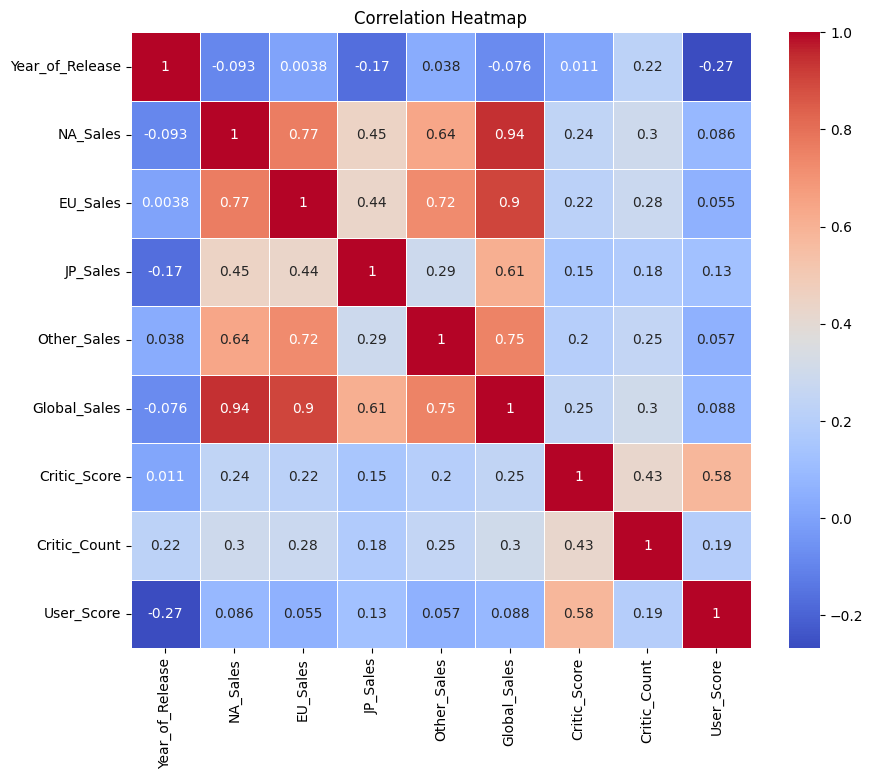

In [11]:
#Explore correlation between features

#select only numeric cols
numeric_df = video.select_dtypes(include=['float64', 'int64'])
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

### Feature Engineering

In [12]:
#Let's look at what independent variables we will keep and whether there are N/A values etc.
#Let's look at what features have N/A values

data_na = (video.isnull().sum() / len(video)) * 100
data_na = data_na.drop(data_na[data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :data_na})
missing_data.head(16)

# if the ratio is less only then delete those rows of a col, as it will not effect the data much

,Missing Ratio
User_Score,54.602548
Critic_Score,51.330821
Critic_Count,51.330821
Rating,40.486871
Developer,39.613613
Year_of_Release,1.608948
Publisher,0.322986
Name,0.011962
Genre,0.011962


Fill missing cells with column median(option 1), 
however the % of null data is too high it might give us some wrong results.

video["Year"].fillna((video["Year"].median()), inplace=True)
video.isnull().sum()

so let's check the missing ratio only for 10 platforms used these days 
and neglect the others.
PS3,PSP,PS,XB, PS4, X360, XOne, PC, Wii and WiiU

In [13]:
video_plat = video[(video['Platform'] == 'PS3') | (video['Platform'] == 'PSP')| (video['Platform'] == 'PS')

| (video['Platform'] == 'XB') | (video['Platform'] == 'PS4') | (video['Platform'] == 'X360') | (video['Platform'] == 'XOne')

| (video['Platform'] == 'PC') | (video['Platform'] == 'Wii') | (video['Platform'] == 'WiiU')]

In [14]:
video_plat.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,Nintendo,E
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,Nintendo,E
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,Nintendo,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.44,6.94,4.70,2.24,28.32,87.0,80.0,8.4,Nintendo,E


In [15]:
#Let's look at what independent variables we will keep and whether there are N/A values etc.
#Let's look at what features have N/A values

data_na = (video_plat.isnull().sum() / len(video_plat)) * 100
data_na = data_na.drop(data_na[data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :data_na})
missing_data.head(16)

# if the ratio is less only then delete those rows of a col, as it will not effect the data much

,Missing Ratio
User_Score,45.181941
Critic_Score,44.586703
Critic_Count,44.586703
Rating,34.737197
Developer,33.299641
Year_of_Release,1.684636
Publisher,0.202156


from above we can see that the % of null data is still too high.
This is still way too big, so let's drop all rows, that have N/A for Critic_Score. 
We cannot replace 40 % of the data with say, the median values.

In [16]:
#now use this dataset
data = video_plat.dropna(subset=['Critic_Score'])

print(data.shape)

(4934, 15)


In [17]:
#Let's look at what independent variables we will keep and whether there are N/A values etc.
#Let's look at what features have N/A values

data_na = (data.isnull().sum() / len(data)) * 100
data_na = data_na.drop(data_na[data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :data_na})
missing_data.head(16)

# if the ratio is less only then delete those rows of a col, as it will not effect the data much

,Missing Ratio
User_Score,8.816376
Year_of_Release,2.026753
Rating,1.621403
Developer,0.121605
Publisher,0.060803


(option1)% of null data is managable so we will now Fill missing cells with column median and mode

In [18]:
# fill NA values with mode,median,mean
data["User_Score"].fillna((data["User_Score"].median()), inplace=True)
data["Year_of_Release"].fillna((data["Year_of_Release"].median()), inplace=True)
data['Developer'] = data['Developer'].fillna(data['Developer'].mode()[0])
data['Rating'] = data['Rating'].fillna(data['Rating'].mode()[0])
data['Publisher'] = data['Publisher'].fillna(data['Publisher'].mode()[0])
#use mean and check

C:\Users\HP\AppData\Local\Temp\ipykernel_18132\2949102740.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["User_Score"].fillna((data["User_Score"].median()), inplace=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_18132\2949102740.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Year_of_Release"].fillna((data["Year_of_Release"].median()), inplace=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_18132\2949102740.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: htt

In [19]:
data.isnull().sum()

Name               0
Platform           0
Year_of_Release    0
Genre              0
Publisher          0
NA_Sales           0
EU_Sales           0
JP_Sales           0
Other_Sales        0
Global_Sales       0
Critic_Score       0
Critic_Count       0
User_Score         0
Developer          0
Rating             0
dtype: int64

(option2)we will remove all the remaning null rows:
data1=data.dropna()

In [20]:
print(data.shape)
data1=data

(4934, 15)


In [21]:
# Identify non-numeric categorical columns
#categorical_columns = video.select_dtypes(include=['object']).columns

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
#for col in categorical_columns:
    #video[col] = label_encoder.fit_transform(video[col])

data['Name']=le.fit_transform(data['Name'])
data['Platform']=le.fit_transform(data['Platform'])
data['Genre']=le.fit_transform(data['Genre'])
data['Publisher']=le.fit_transform(data['Publisher'])
data['Developer']=le.fit_transform(data['Developer'])
data['Rating']=le.fit_transform(data['Rating'])

C:\Users\HP\AppData\Local\Temp\ipykernel_18132\2940937466.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Name']=le.fit_transform(data['Name'])
C:\Users\HP\AppData\Local\Temp\ipykernel_18132\2940937466.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Platform']=le.fit_transform(data['Platform'])
C:\Users\HP\AppData\Local\Temp\ipykernel_18132\2940937466.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer

In [22]:
data.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,Developer,Rating
0,3174,5,2006.0,10,150,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,666,1
2,1549,5,2008.0,6,150,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,666,1
3,3176,5,2009.0,10,150,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,666,1
7,3172,5,2006.0,3,150,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,666,1
8,1926,5,2009.0,4,150,14.44,6.94,4.70,2.24,28.32,87.0,80.0,8.4,666,1


In [23]:
print(pd.value_counts(data["Publisher"]))

Publisher
57     688
9      382
225    370
212    241
209    214
      ... 
155      1
8        1
132      1
242      1
161      1
Name: count, Length: 250, dtype: int64


C:\Users\HP\AppData\Local\Temp\ipykernel_18132\2649046620.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  print(pd.value_counts(data["Publisher"]))


In [24]:
r=video_plat.dropna(subset=['Critic_Score'])
print(pd.value_counts(r["Publisher"]))

Publisher
Electronic Arts         685
Activision              382
Ubisoft                 370
Take-Two Interactive    241
THQ                     214
                       ... 
NovaLogic                 1
Acquire                   1
Mercury Games             1
Xseed Games               1
Paradox Development       1
Name: count, Length: 250, dtype: int64


C:\Users\HP\AppData\Local\Temp\ipykernel_18132\638969416.py:2: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  print(pd.value_counts(r["Publisher"]))


In [25]:
selected_features1 = ['Platform','Year_of_Release','Genre','Publisher','Critic_Score','Critic_Count',
                     'User_Score','Developer','Rating', 'NA_Sales', 'EU_Sales',
                     'Other_Sales', 'JP_Sales']
X1 = data[selected_features1]
y1 = data['Global_Sales']

('Platform', 1.4297166100708771)
('Year_of_Release', 1.2769595794059538)
('Genre', 1.0276884806391635)
('Publisher', 0.9587150739642496)
('Critic_Score', 2.9459891612339053)
('Critic_Count', 5.780945670548177)
('User_Score', 1.0924403185350666)
('Developer', 0.9626336653838469)
('Rating', 0.8601053382949888)
('NA_Sales', 559.8088949899151)
('EU_Sales', 417.5402516992105)
('Other_Sales', 351.9295749312543)
('JP_Sales', 42.774671068084174)


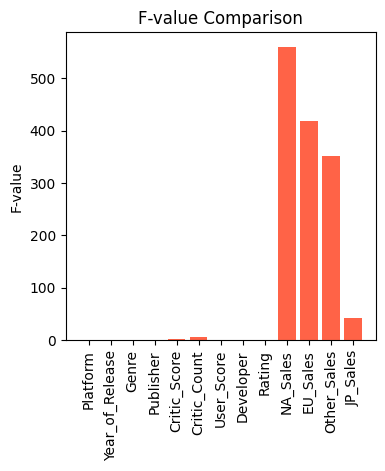

In [26]:
#ANOVA F-value Feature Selection

# Import f_classif from Scikit-learn
from sklearn.feature_selection import f_classif

# Create f_classif object to calculate F-value
f_value = f_classif(X1, y1)

# Print the name and F-value of each feature
for feature in zip(selected_features1, f_value[0]):
    print(feature)

# Create a bar chart for visualizing the F-values
plt.figure(figsize=(4,4))
plt.bar(x=selected_features1, height=f_value[0], color='tomato')
plt.xticks(rotation='vertical')
plt.ylabel('F-value')
plt.title('F-value Comparison')
plt.show()

('Platform', 8.319763644600005)
('Year_of_Release', 16.68851691948639)
('Genre', 15.137365391797589)
('Publisher', 6224.952212208858)
('Critic_Score', 202.3083112981095)
('Critic_Count', 420.63345935296053)
('User_Score', 1.932587249792108)
('Developer', 101079.0032784601)
('Rating', 4.237700147007382)
('NA_Sales', 1.0761820775871005)
('EU_Sales', 0.5357143534419232)
('Other_Sales', 0.05018339403597285)
('JP_Sales', 0.04778018586320378)


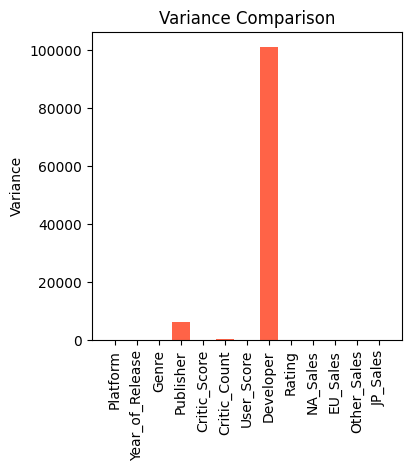

Number of features before variance thresholding: 13
Number of features after variance thresholding: 11


In [27]:
#VarianceThreshold Feature Selection

# Import VarianceThreshold from Scikit-learn
from sklearn.feature_selection import VarianceThreshold

# Create VarianceThreshold object to perform variance thresholding
selector = VarianceThreshold(threshold=0.25)

# Perform variance thresholding
s=selector.fit_transform(X1)

# Print the name and variance of each feature
for feature in zip(selected_features1, selector.variances_):
    print(feature)

# Create a bar chart for visualizing the variances
plt.figure(figsize=(4,4))
plt.bar(x=selected_features1, height=selector.variances_, color='tomato')
plt.xticks(rotation='vertical')
plt.ylabel('Variance')
plt.title('Variance Comparison')

plt.show()

print('Number of features before variance thresholding: {}'.format(X1.shape[1]))
print('Number of features after variance thresholding: {}'.format(s.shape[1]))

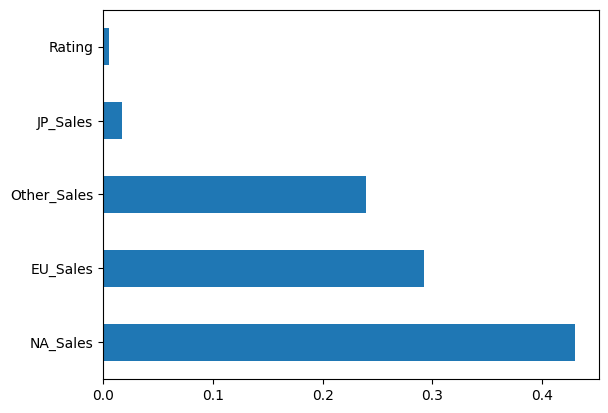

In [28]:
from sklearn.ensemble import ExtraTreesRegressor
reg= ExtraTreesRegressor()
reg.fit(X1,y1)
reg.feature_importances_
feat_importances = pd.Series(reg.feature_importances_, index=X1.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

Import mutual_info_classif from Scikit-learn
from sklearn.feature_selection import mutual_info_classif

Create mutual_info_classif object to calculate mutual information
MI_score = mutual_info_classif(X1, y1, random_state=0)

Print the name and mutual information score of each feature
for feature in zip(selected_features1, MI_score):
    print(feature)

Create a bar chart for visualizing the mutual information scores
plt.figure(figsize=(4,4))
plt.bar(x=selected_features1, height=MI_score, color='tomato')
plt.xticks(rotation='vertical')
plt.ylabel('Mutual Information Score')
plt.title('Mutual Information Score Comparison')

plt.show()

In [29]:
#Using Selector Object for Selecting Features
# Import SelectKBest from Scikit-learn
from sklearn.feature_selection import SelectKBest

# Create a SelectKBest object
skb = SelectKBest(score_func=f_classif, # Set f_classif as our criteria to select features
                  k=2)                  # Select top two features based on the criteria

# Train and transform the dataset according to the SelectKBest
X_data_new = skb.fit_transform(X1, y1)

# Print the results
print('Number of features before feature selection: {}'.format(X1.shape[1]))
print('Number of features after feature selection: {}'.format(X_data_new.shape[1]))

# Print the name of the selected features
for feature_list_index in skb.get_support(indices=True):
    print('- ' + selected_features1[feature_list_index])

Number of features before feature selection: 13
Number of features after feature selection: 2
- NA_Sales
- EU_Sales


In [30]:
selected_features2 = ['Platform','Year_of_Release','Genre','Publisher','Critic_Score','Critic_Count',
                     'User_Score','Rating', 'NA_Sales', 'EU_Sales',
                     'Other_Sales', 'JP_Sales']
X2 = data[selected_features2]
y2 = data['Global_Sales']

In [31]:
#split the data to test & train
X_train,X_test,y_train,y_test=tts(X2,y2,test_size=0.25,random_state=42)

In [32]:
#Linear Regression model
# Train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

In [33]:
#RandomForestRegressor gridsearchCV
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(random_state=42)
parameters_rf = {'n_estimators': [10, 50, 100], 'max_depth': [None, 10,15,20]}
grid_RF = GridSearchCV(estimator=regressor, param_grid=parameters_rf, cv=2, n_jobs=-1)
grid_RF.fit(X_train, y_train)

print("\nResults from Grid Search for Random Forest:")
print("\n The best estimator across ALL searched params:\n", grid_RF.best_estimator_)
print("\n The best score across ALL searched params:\n", grid_RF.best_score_)
print("\n The best parameters across ALL searched params:\n", grid_RF.best_params_)


Results from Grid Search for Random Forest:

 The best estimator across ALL searched params:
 RandomForestRegressor(random_state=42)

 The best score across ALL searched params:
 0.8522214967256636

 The best parameters across ALL searched params:
 {'max_depth': None, 'n_estimators': 100}


In [34]:
#RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
regressor1 = RandomForestRegressor(max_depth= None, n_estimators= 100, random_state=42)
regressor1.fit(X_train, y_train)

# Make predictions on the testing set
y_pred1 = regressor1.predict(X_test)

In [35]:
#Decision Tree Regressor gridsearchCV 
from sklearn.tree import DecisionTreeRegressor 
DT = DecisionTreeRegressor(random_state = 42)
parameters_dt = {'max_depth': [None, 10,15,20], 'min_samples_split': [2, 5, 10, 15]}
grid_DT = GridSearchCV(estimator=DT, param_grid=parameters_dt, cv=2, n_jobs=-1)
grid_DT.fit(X_train, y_train)

print("\nResults from Grid Search for Decision Tree:")
print("\n The best estimator across ALL searched params:\n", grid_DT.best_estimator_)
print("\n The best score across ALL searched params:\n", grid_DT.best_score_)
print("\n The best parameters across ALL searched params:\n", grid_DT.best_params_)


Results from Grid Search for Decision Tree:

 The best estimator across ALL searched params:
 DecisionTreeRegressor(max_depth=10, random_state=42)

 The best score across ALL searched params:
 0.8315364900089874

 The best parameters across ALL searched params:
 {'max_depth': 10, 'min_samples_split': 2}


In [36]:
#Decision Tree Regressor 
DT1 = DecisionTreeRegressor(max_depth= 10,min_samples_split= 2, random_state = 42)
DT1.fit(X_train, y_train)

# Make predictions on the testing set
y_pred2 = DT1.predict(X_test)

In [37]:
#SVR gridsearchCV 
from sklearn.svm import SVR
SVR_model = SVR(kernel = 'rbf')
parameters_svr = {'kernel': ['linear', 'poly', 'rbf'], 'C': [0.1, 1, 10]}
grid_SVR = GridSearchCV(estimator=SVR_model, param_grid=parameters_svr, cv=2, n_jobs=-1)
grid_SVR.fit(X_train, y_train)

print("\nResults from Grid Search for Support Vector Regressor (SVR):")
print("\n The best estimator across ALL searched params:\n", grid_SVR.best_estimator_)
print("\n The best score across ALL searched params:\n", grid_SVR.best_score_)
print("\n The best parameters across ALL searched params:\n", grid_SVR.best_params_)


Results from Grid Search for Support Vector Regressor (SVR):

 The best estimator across ALL searched params:
 SVR(C=0.1, kernel='linear')

 The best score across ALL searched params:
 0.9800930647145737

 The best parameters across ALL searched params:
 {'C': 0.1, 'kernel': 'linear'}


In [38]:
# SVR
from sklearn.svm import SVR
SVR_model1 = SVR(C= 0.1, kernel= 'linear')

SVR_model1.fit(X_train, y_train)

# Make predictions on the testing set
y_pred3 = SVR_model1.predict(X_test)

In [39]:
import xgboost as xgb
xgb = xgb.XGBRegressor(objective ='reg:squarederror', learning_rate = 0.1, max_depth = 5, n_estimators = 100)
xgb.fit(X_train, y_train)

# Prediction
y_pred4 = xgb.predict(X_test)

In [40]:
# Evaluation of all model using RSME
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error (RMSE) for Linear Regression:', rmse)

rmse1 = np.sqrt(mean_squared_error(y_test, y_pred1))
print('Root Mean Squared Error (RMSE) for RandomForestRegressor:', rmse1)

#mse2=mean_squared_error(y_test, y_pred2)

rmse2 = np.sqrt(mean_squared_error(y_test, y_pred2))
print('Root Mean Squared Error (RMSE) for Decision Tree:', rmse2)

rmse3 = np.sqrt(mean_squared_error(y_test, y_pred3))
print('Root Mean Squared Error (RMSE) for SVR:', rmse3)

rmse4 = np.sqrt(mean_squared_error(y_test, y_pred4))
print(f'Root Mean Squared Error (RMSE) of XGBRegressor : {rmse4}')

Root Mean Squared Error (RMSE) for Linear Regression: 0.005947773569937608
Root Mean Squared Error (RMSE) for RandomForestRegressor: 0.16449363369669437
Root Mean Squared Error (RMSE) for Decision Tree: 0.35194627821354557
Root Mean Squared Error (RMSE) for SVR: 0.02747042797230643
Root Mean Squared Error (RMSE) of XGBRegressor : 0.17596142884040278


## Final Selected model as per above best RMSE is SVR with value:0.0274

In [41]:
data.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,Developer,Rating
0,3174,5,2006.0,10,150,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,666,1
2,1549,5,2008.0,6,150,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,666,1
3,3176,5,2009.0,10,150,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,666,1
7,3172,5,2006.0,3,150,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,666,1
8,1926,5,2009.0,4,150,14.44,6.94,4.70,2.24,28.32,87.0,80.0,8.4,666,1


In [42]:
# Predict global sales for a new game (replace with actual values)
# selected rank 2 from actual dataset
#selected_features2 = ['Platform','Year_of_Release','Genre','Publisher','Critic_Score','Critic_Count',
#'User_Score','Rating', 'NA_Sales', 'EU_Sales',
#'Other_Sales', 'JP_Sales']

test_case = pd.DataFrame({
'Platform':[5],
'Year_of_Release':[2006],
'Genre':[10],
'Publisher':[150],
'Critic_Score':[76.0],
'Critic_Count':[51.0],
'User_Score':[8.0],
'Rating':[1],
'NA_Sales': [41.36],
'EU_Sales': [28.96],
'Other_Sales': [8.45],
'JP_Sales': [3.77],
})
print('best performing model is Linear Regression')
predicted_global_sales = model.predict(test_case)
print("Predicted Global Sales",predicted_global_sales[0])

best performing model is Linear Regression
Predicted Global Sales 82.5286097321525


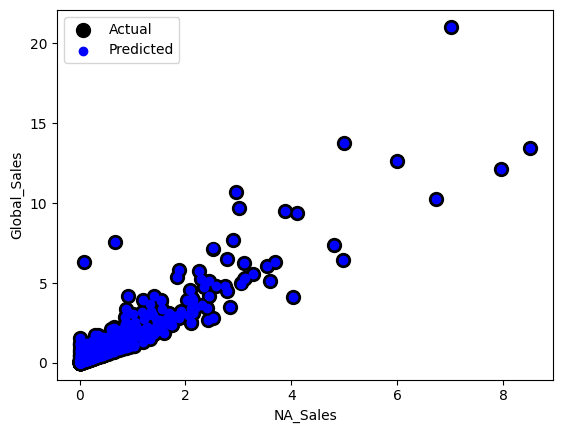

In [44]:
# Plot Linear Regression
plt.scatter(X_test['NA_Sales'], y_test,s=100, color='black', label='Actual')
plt.scatter(X_test['NA_Sales'], y_pred, color='blue', label='Predicted')
plt.xlabel('NA_Sales')
plt.ylabel('Global_Sales')
plt.legend()

# Add a regression line
#plt.plot(X_test['NA_Sales'], y_pred, color='red', linewidth=3, label='Regression Line')

plt.show()